# Stuck Pipe Events Prediction - Analisis Exploratorio de Datos

# 1. Carga De Librerias Y Datos

In [103]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import statistics

import warnings
warnings.filterwarnings("ignore")

from pycaret.datasets import get_data
from pycaret.classification import *

%matplotlib widget

In [104]:
# Funciones necesarias para el procesamiento de la informacion

def unir_data(df_old,df_new):
    '''
    Esta funcion une el datframe de los datos previos con el dataframe de los datos nuevos
    '''
    
    df= pd.concat([df_old, df_new], axis=0)
    return df

In [105]:
# Lectura de archivos por evento
Evento1 = pd.read_csv("Evento 1.csv")
Evento2 = pd.read_csv("Evento 2.csv")
Evento3 = pd.read_csv("Evento 3.csv")
Evento4 = pd.read_csv("Evento 4.csv")
Evento5 = pd.read_csv("Evento 5.csv")
Evento6 = pd.read_csv("Evento 6.csv")
Evento8 = pd.read_csv("Evento 8.csv")
Evento9 = pd.read_csv("Evento 9.csv")
Evento10 = pd.read_csv("Evento 10.csv")
Evento11 = pd.read_csv("Evento 11.csv")
Evento12 = pd.read_csv("Evento 12.csv")
Evento13 = pd.read_csv("Evento 13.csv")
Evento14 = pd.read_csv("Evento 14.csv")
Evento15 = pd.read_csv("Evento 15.csv")
Evento16 = pd.read_csv("Evento 16.csv")

In [106]:
# Unimos todos los datframes de los archivos en un solo dataframe para trabajo
df = unir_data(Evento1,Evento2)
df = unir_data(df,Evento3)
df = unir_data(df,Evento4)
df = unir_data(df,Evento5)
df = unir_data(df,Evento6)
df = unir_data(df,Evento8)
df = unir_data(df,Evento9)
df = unir_data(df,Evento10)
df = unir_data(df,Evento11)
df = unir_data(df,Evento12)
df = unir_data(df,Evento13)
df = unir_data(df,Evento14)
df = unir_data(df,Evento15)
df = unir_data(df,Evento16)

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time',inplace=True)
    
df

,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento,Pega
Time,,,,,,,,,,
2015-02-01 00:00:57,57.708860,430.624454,1.301011,1.016953,357.482920,2022.031010,68.507219,0.0,Evento 1,0
2015-02-01 00:01:00,55.942886,429.602631,1.165243,0.680712,360.418803,2058.592517,60.428979,0.0,Evento 1,0
2015-02-01 00:01:03,54.164406,428.439948,0.942667,0.394440,365.651801,2097.301313,52.715292,0.0,Evento 1,0
2015-02-01 00:01:06,52.383372,428.350848,0.769924,0.365904,366.095786,2096.310389,46.199610,0.0,Evento 1,0
2015-02-01 00:01:09,50.617904,428.265523,0.516112,0.341655,366.543219,2127.829605,39.726500,0.0,Evento 1,0
...,...,...,...,...,...,...,...,...,...,...
2014-04-23 17:01:33,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1
2014-04-23 17:01:36,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1
2014-04-23 17:01:39,49.614314,306.256665,6.008588,4.371957,67.291780,1382.719355,87.606353,0.0,Evento 16,1


# 2. Definicion De Actividad De Los Eventos

In [107]:
# Creamos la columna de Actividad
df["Actividad"] = np.nan

In [108]:
df.Evento.unique()

array(['Evento 1', 'Evento 2', 'Evento 3', 'Evento 4', 'Evento 5',
       'Evento 6', 'Evento 8', 'Evento 9', 'Evento 10', 'Evento 11',
       'Evento 12', 'Evento 13', 'Evento 14', 'Evento 15', 'Evento 16'],
      dtype=object)

In [109]:
# Se definen las actividades para cada evento
df.loc[df["Evento"]=="Evento 1","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 2","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 3","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 4","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 5","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 6","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 8","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 9","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 10","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 11","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 12","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 13","Actividad"]="POOH"
df.loc[df["Evento"]=="Evento 14","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 15","Actividad"]="RIH"
df.loc[df["Evento"]=="Evento 16","Actividad"]="RIH"

In [110]:
# Exportamos los datos para realizar pruebas de modelos
df.to_csv('Base.csv')

# 3. Distribuciones De Variables

In [111]:
# Funcion que filtra los datos dado un tiempo dado requerido antes de la pega

def filtra_tiempo_previo(df,Evento,Tiempo):
    
    '''
    Funcion que filtra los datos dado un tiempo dado requerido antes de la pega
    
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Tiempo: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    #- Subset del intervalo de interes
    df = df[(df.Evento==Evento)&(df.Pega==0)]
    last = df.index[-1]

    first_ts = last - pd.Timedelta(Tiempo, 'minutes')
    filtered_df = df[df.index >= first_ts]
    
    return filtered_df

# Funcion que realiza box-plots de los parametros un tiempo dado antes del evento de pega para un evento dado

def box_plots_prev(df,Evento,Tiempo):
    
    '''
    Funcion que genera los box-plots de los parametros un tiempo antes del evento de pega
    
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Evento: String con el evento de interés.
    - Tiempo: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    # Se filtra el dataframe
    filtered_df = filtra_tiempo_previo(df,Evento,Tiempo)
    
    # Generación de las graficas
    
    fig, axs = plt.subplots(1, 8,figsize=(12,4))
    fig.suptitle("Parametros " + str(Tiempo) + " Minutos Previos A La Pega " + Evento, fontsize=22)
    
    axs[0].boxplot(filtered_df["Block Height"])
    axs[0].set_title("Block Height")
    
    axs[1].boxplot(filtered_df["Hook Load"])
    axs[1].set_title("Hook Load")
    
    axs[2].boxplot(filtered_df["WOB"])
    axs[2].set_title("WOB")

    axs[3].boxplot(filtered_df["Torque"])
    axs[3].set_title("Torque")
    
    axs[4].boxplot(filtered_df["Flow In"])
    axs[4].set_title("Flow In")
    
    axs[5].boxplot(filtered_df["Pump Pressure"])
    axs[5].set_title("Pump Pressure")
    
    axs[6].boxplot(filtered_df["RPM"])
    axs[6].set_title("RPM")

    axs[7].boxplot(filtered_df["ROP"])
    axs[7].set_title("ROP")
     
    fig.tight_layout()
    
    return fig;


In [112]:
# Funcion que realiza box-plots de los parametros un tiempo dado antes del evento de pega para un evento dado

def box_plots_prev_tot(df,Tiempo):
    
    '''
    Funcion que genera los box-plots de los parametros un tiempo antes del evento de pega
    
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Tiempo: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    lista_eventos = df.Evento.unique()
    
    filtered_df = pd.DataFrame()
    
    for evento in lista_eventos:
        
        filtered_df = pd.concat([filtered_df,filtra_tiempo_previo(df,evento,Tiempo)])
    
    
    # Generación de las graficas
    
    fig2, axs = plt.subplots(1, 8,figsize=(12,4))
    fig2.suptitle("Parametros " + str(Tiempo) + " Minutos Previos A La Pega", fontsize=22)
    
    axs[0].boxplot(filtered_df["Block Height"])
    axs[0].set_title("Block Height")
    
    axs[1].boxplot(filtered_df["Hook Load"])
    axs[1].set_title("Hook Load")
    
    axs[2].boxplot(filtered_df["WOB"])
    axs[2].set_title("WOB")

    axs[3].boxplot(filtered_df["Torque"])
    axs[3].set_title("Torque")
    
    axs[4].boxplot(filtered_df["Flow In"])
    axs[4].set_title("Flow In")
    
    axs[5].boxplot(filtered_df["Pump Pressure"])
    axs[5].set_title("Pump Pressure")
    
    axs[6].boxplot(filtered_df["RPM"])
    axs[6].set_title("RPM")

    axs[7].boxplot(filtered_df["ROP"])
    axs[7].set_title("ROP")
    
    fig2.tight_layout()

In [113]:
box_plots_prev_tot(df.loc[df["Actividad"]=="RIH"],1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [114]:
box_plots_prev_tot(df.loc[df["Actividad"]=="POOH"],1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [115]:
box_plots_prev_tot(df,5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [125]:
box_plots_prev_tot(df,30)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [230]:
# Funcion que genera un dataframe con las medias de todos los parámetros para todo los eventos y con 3 tiempos 
def medias_tiempo_previo_tot(df,Actividad,Tiempo1,Tiempo2,Tiempo3):
    
    '''
    ---------------------------------------------------------------------------------------------------------
    Funcion que filtra los datos dado un tiempo dado requerido antes de la pega
    ---------------------------------------------------------------------------------------------------------
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Evento: String con el nombre del evento de interes
    - Tiempo1, Tiempo2, Tiempo3: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    df = df.loc[df["Actividad"]==Actividad]
    
    lista_eventos = df.Evento.unique()
    filtered_df1 = pd.DataFrame()
    filtered_df2 = pd.DataFrame()
    filtered_df3 = pd.DataFrame()
    
    for evento in lista_eventos:
        filtered_df1 = pd.concat([filtered_df1,filtra_tiempo_previo(df,evento,Tiempo1)])
        
    for evento in lista_eventos:
        filtered_df2 = pd.concat([filtered_df2,filtra_tiempo_previo(df,evento,Tiempo2)])
        
    for evento in lista_eventos:
        filtered_df3 = pd.concat([filtered_df3,filtra_tiempo_previo(df,evento,Tiempo3)])
        
        
    medias1 = filtered_df1.mean(axis=0)
    #medias1 = pd.DataFrame(medias1[0:-1],columns=["Media " + str(Tiempo1) + " Minutos"])
    
    medias2 = filtered_df2.mean(axis=0)
    #medias2 = pd.DataFrame(medias2[0:-1],columns=["Media " + str(Tiempo2) + " Minutos"])
    
    medias3 = filtered_df3.mean(axis=0)
    #medias3 = pd.DataFrame(medias3[0:-1],columns=["Media " + str(Tiempo3) + " Minutos"])
    
    # list of name, degree, score
    nme = ["aparna", "pankaj", "sudhir", "Geeku"]
    deg = ["MBA", "BCA", "M.Tech", "MBA"]
    scr = [90, 40, 80, 98]

    # dictionary of lists 
    dict = {"Media " + str(Tiempo1) + " Min": medias1, "Media " + str(Tiempo2) + " Min": medias2, "Media " + str(Tiempo3) + " Min": medias3} 

    df = pd.DataFrame(dict)
    df = df[:-1]
    
    return df

def box_plots_by_var(df,Variable,Tiempo1,Tiempo2,Tiempo3):
    
    '''
    ----------------------------------------------------------------------------------------------------------------------------------------------------
    Funcion que genera tres box-plots compandando las distribuciones de una variable dada, de una actividad dada en tres tiempos previos a la pega dados
    ----------------------------------------------------------------------------------------------------------------------------------------------------
    - df:       Dataframe con los datos de los parámetros de todos los eventos.
    - Variable: String con el nombre de la variable de interes
    - Actividad: Strig con el nombre de la actividad que se hacia durante la pega (RIH ó POOH)
    - Evento:   String con el nombre del evento de interes
    - Tiempo1, Tiempo2, Tiempo3: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    df_RIH = df.loc[df["Actividad"]=="RIH",[Variable,"Evento","Pega"]]
    df_POOH = df.loc[df["Actividad"]=="POOH",[Variable,"Evento","Pega"]]
    
    #df = df[[Variable,"Evento","Pega","Actividad"]]
    
    lista_eventos_RIH = df_RIH.Evento.unique()
    lista_eventos_POOH = df_POOH.Evento.unique()
    
    filtered_df1_RIH = pd.DataFrame()
    filtered_df2_RIH = pd.DataFrame()
    filtered_df3_RIH = pd.DataFrame()
    filtered_df1_POOH = pd.DataFrame()
    filtered_df2_POOH = pd.DataFrame()
    filtered_df3_POOH = pd.DataFrame()
    
    # Eventos RIH    
    for evento in lista_eventos_RIH:
        filtered_df1_RIH = pd.concat([filtered_df1_RIH,filtra_tiempo_previo(df_RIH,evento,Tiempo1)])
        filtered_df2_RIH = pd.concat([filtered_df2_RIH,filtra_tiempo_previo(df_RIH,evento,Tiempo2)])
        filtered_df3_RIH = pd.concat([filtered_df3_RIH,filtra_tiempo_previo(df_RIH,evento,Tiempo3)])

    # Eventos POOH    
    for evento in lista_eventos_POOH:
        filtered_df1_POOH = pd.concat([filtered_df1_POOH,filtra_tiempo_previo(df_POOH,evento,Tiempo1)])
        filtered_df2_POOH = pd.concat([filtered_df2_POOH,filtra_tiempo_previo(df_POOH,evento,Tiempo2)])
        filtered_df3_POOH = pd.concat([filtered_df3_POOH,filtra_tiempo_previo(df_POOH,evento,Tiempo3)])

    filtered_df1_RIH["Min Antes"] = Tiempo1
    filtered_df2_RIH["Min Antes"] = Tiempo2
    filtered_df3_RIH["Min Antes"] = Tiempo3
    filtered_df1_RIH["Actividad"] = "RIH"
    filtered_df2_RIH["Actividad"] = "RIH"
    filtered_df3_RIH["Actividad"] = "RIH"
    
    filtered_df1_POOH["Min Antes"] = Tiempo1
    filtered_df2_POOH["Min Antes"] = Tiempo2
    filtered_df3_POOH["Min Antes"] = Tiempo3
    filtered_df1_POOH["Actividad"] = "POOH"
    filtered_df2_POOH["Actividad"] = "POOH"
    filtered_df3_POOH["Actividad"] = "POOH"
    
    df_filtered = pd.concat([filtered_df1_RIH,filtered_df2_RIH])
    df_filtered = pd.concat([df_filtered,filtered_df3_RIH])
    df_filtered = pd.concat([df_filtered,filtered_df1_POOH])
    df_filtered = pd.concat([df_filtered,filtered_df2_POOH])
    df_filtered = pd.concat([df_filtered,filtered_df3_POOH])

    # Generación de las graficas
    
    fig3, axs = plt.subplots(1, 1,figsize=(12,7))
    
    hue_order = [Tiempo3, Tiempo2, Tiempo1]
    
    fig3.suptitle("Distribucion " + Variable + " Antes Del Evento De Pega", fontsize=22)

    axs = sns.boxplot(x = "Actividad", y = Variable,hue = "Min Antes",data = df_filtered,hue_order = hue_order)

In [231]:
box_plots_by_var(df,"WOB",1,5,15)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [232]:
box_plots_by_var(df,"RPM",1,5,15)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [120]:
# Funcion que genera un dataframe con las medias de todos los parámetros para todo los eventos y con 3 tiempos 
def mediana_tiempo_previo_tot(df,Actividad,Tiempo1,Tiempo2,Tiempo3):
    
    '''
    ---------------------------------------------------------------------------------------------------------
    Funcion que filtra los datos dado un tiempo dado requerido antes de la pega
    ---------------------------------------------------------------------------------------------------------
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Evento: String con el nombre del evento de interes
    - Tiempo1, Tiempo2, Tiempo3: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''

    df = df.loc[df["Actividad"]==Actividad]
    
    lista_eventos = df.Evento.unique()
    filtered_df1 = pd.DataFrame()
    filtered_df2 = pd.DataFrame()
    filtered_df3 = pd.DataFrame()
    
    for evento in lista_eventos:
        filtered_df1 = pd.concat([filtered_df1,filtra_tiempo_previo(df,evento,Tiempo1)])
        
    for evento in lista_eventos:
        filtered_df2 = pd.concat([filtered_df2,filtra_tiempo_previo(df,evento,Tiempo2)])
        
    for evento in lista_eventos:
        filtered_df3 = pd.concat([filtered_df3,filtra_tiempo_previo(df,evento,Tiempo3)])
        
        
    medias1 = filtered_df1.median(axis=0)
    #medias1 = pd.DataFrame(medias1[0:-1],columns=["Media " + str(Tiempo1) + " Minutos"])
    
    medias2 = filtered_df2.median(axis=0)
    #medias2 = pd.DataFrame(medias2[0:-1],columns=["Media " + str(Tiempo2) + " Minutos"])
    
    medias3 = filtered_df3.median(axis=0)
    #medias3 = pd.DataFrame(medias3[0:-1],columns=["Media " + str(Tiempo3) + " Minutos"])
    
    # list of name, degree, score
    nme = ["aparna", "pankaj", "sudhir", "Geeku"]
    deg = ["MBA", "BCA", "M.Tech", "MBA"]
    scr = [90, 40, 80, 98]

    # dictionary of lists 
    dict = {"Mediana " + str(Tiempo1) + " Min": medias1, "Mediana " + str(Tiempo2) + " Min": medias2, "Mediana " + str(Tiempo3) + " Min": medias3} 

    df = pd.DataFrame(dict)
    df = df[:-1]
    
    return df

In [121]:
medias_tiempo_previo_tot(df,"RIH",1,5,15)

,Media 1 Min,Media 5 Min,Media 15 Min
Block Height,61.571518,57.194688,63.567463
Hook Load,312.559064,297.946379,318.363502
WOB,2.987909,5.419643,5.110894
Torque,5.558312,6.103186,5.705252
Flow In,220.686085,228.894379,253.890807
Pump Pressure,1593.397122,1638.338632,1672.646705
RPM,77.249206,85.042042,95.911961
ROP,0.380689,0.381751,0.381025


In [122]:
medias_tiempo_previo_tot(df,"POOH",1,5,15)

,Media 1 Min,Media 5 Min,Media 15 Min
Block Height,23.381598,35.712977,60.924399
Hook Load,271.143736,249.676478,252.948037
WOB,13.267958,13.348157,9.724993
Torque,1.891293,3.501505,2.267810
Flow In,147.519990,141.237601,242.647770
Pump Pressure,177.990226,182.881688,948.267828
RPM,57.216796,53.795138,71.220970
ROP,0.325973,0.324247,0.313198


In [123]:
mediana_tiempo_previo_tot(df,"RIH",1,5,15)

,Mediana 1 Min,Mediana 5 Min,Mediana 15 Min
Block Height,63.309557,59.525069,61.479632
Hook Load,336.664944,336.666390,334.799552
WOB,1.709245,3.158204,1.962769
Torque,0.745811,2.180134,3.237061
Flow In,80.674403,96.331448,113.800968
Pump Pressure,1364.935247,1505.340684,1855.875101
RPM,47.319137,59.822854,67.871629
ROP,0.000000,0.000000,0.000000


In [124]:
mediana_tiempo_previo_tot(df,"POOH",1,5,15)

,Mediana 1 Min,Mediana 5 Min,Mediana 15 Min
Block Height,24.376283,28.566007,52.330353
Hook Load,234.976886,234.976630,246.038226
WOB,13.607256,11.898350,5.908360
Torque,0.651084,0.701475,0.661257
Flow In,44.245591,48.899683,99.463320
Pump Pressure,4.647249,11.713096,395.382649
RPM,23.866693,22.663111,22.702004
ROP,0.000000,0.000000,0.000000


In [235]:
df

,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento,Pega,Actividad
Time,,,,,,,,,,,
2015-02-01 00:00:57,57.708860,430.624454,1.301011,1.016953,357.482920,2022.031010,68.507219,0.0,Evento 1,0,RIH
2015-02-01 00:01:00,55.942886,429.602631,1.165243,0.680712,360.418803,2058.592517,60.428979,0.0,Evento 1,0,RIH
2015-02-01 00:01:03,54.164406,428.439948,0.942667,0.394440,365.651801,2097.301313,52.715292,0.0,Evento 1,0,RIH
2015-02-01 00:01:06,52.383372,428.350848,0.769924,0.365904,366.095786,2096.310389,46.199610,0.0,Evento 1,0,RIH
2015-02-01 00:01:09,50.617904,428.265523,0.516112,0.341655,366.543219,2127.829605,39.726500,0.0,Evento 1,0,RIH
...,...,...,...,...,...,...,...,...,...,...,...
2014-04-23 17:01:33,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1,RIH
2014-04-23 17:01:36,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1,RIH
2014-04-23 17:01:39,49.614314,306.256665,6.008588,4.371957,67.291780,1382.719355,87.606353,0.0,Evento 16,1,RIH


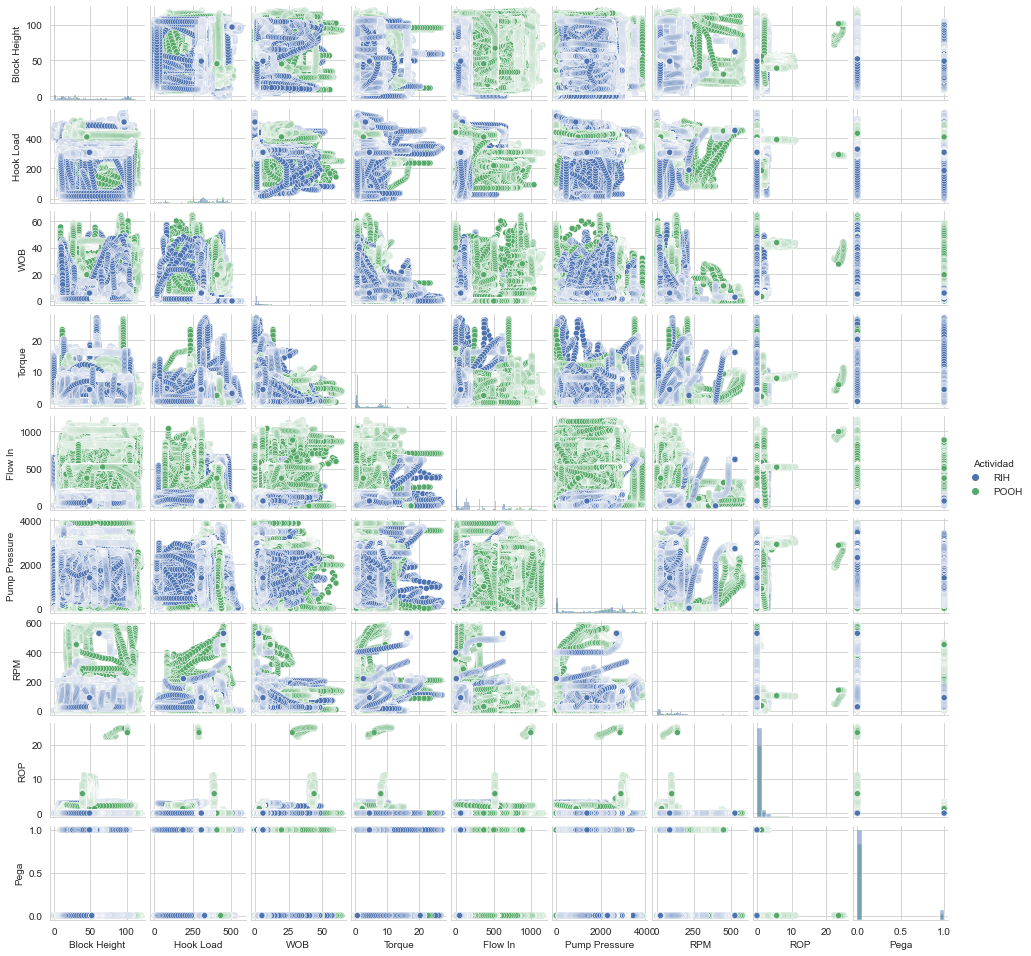

In [240]:
%matplotlib inline
sns.pairplot(df, hue="Actividad",diag_kind="hist",height=1.5)